In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, pipeline, preprocessing
import itertools

%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Part 3

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [26]:
df = pd.read_csv("car_data.csv")

In [65]:
df.head(3)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0


In [28]:
X = df[['Mileage']]
y = df[['Price']]

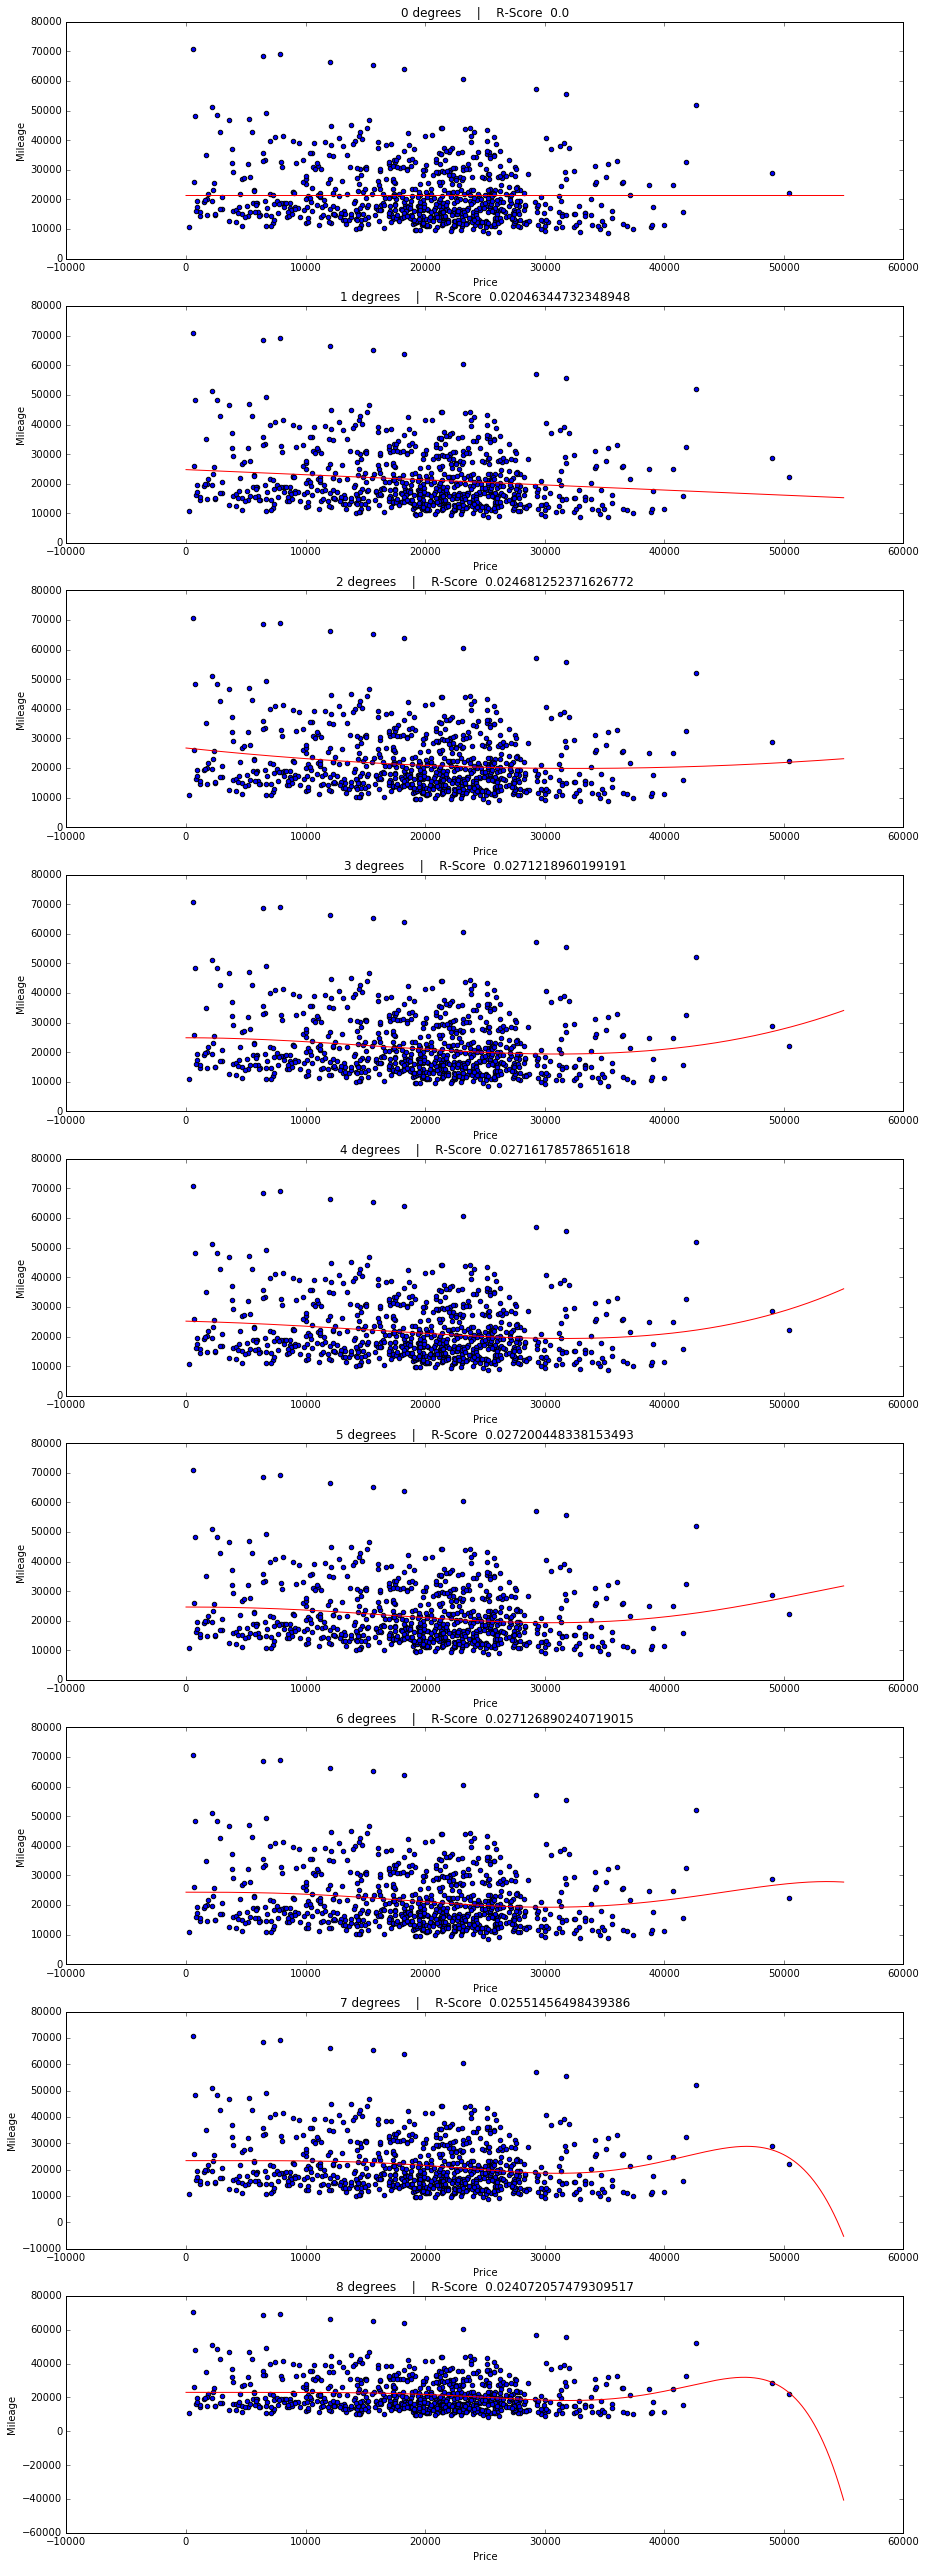

In [45]:
degrees = 9
fig, axs = plt.subplots(degrees, figsize=(15, 45))

for degree in range(degrees):
    model = pipeline.Pipeline([
        ('poly', preprocessing.PolynomialFeatures(degree=degree)),
        ('linear', linear_model.LinearRegression())])

    points = 55000

    model = model.fit(X, y)
    model_score = model.score(X, y)

    subplot = axs[degree]
    subplot.plot(model.predict([[j] for j in range(points)]), color='r')
    subplot.scatter(X, y)
    subplot.set_title('{} degrees    |    R-Score  {}'.format(degree, model_score))
    subplot.set_ylabel('Mileage')
    subplot.set_xlabel('Price')

plt.show()

In [30]:
cols = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
X_many = df[cols]

lin_reg = linear_model.LinearRegression()
result = lin_reg.fit(X_many,y)
print(lin_reg.score(X_many, y))
print(lin_reg.intercept_)
print(lin_reg.coef_)

0.446264353673
[ 6758.7551436]
[[ -1.69747832e-01   3.79237893e+03  -7.87220732e+02  -1.54274585e+03
    6.28899715e+03  -1.99379528e+03   3.34936162e+03]]


In [31]:
combinations = []
for x in range(1, 8):
    combinations.append(itertools.combinations(cols, x))

best_score = 0
for com in combinations:
    for group in com:
        group = list(group)
        price_x = df[group]
        degrees = 9

        for degree in range(degrees):
            model = pipeline.Pipeline([
                ('poly', preprocessing.PolynomialFeatures(degree=degree)),
                ('linear', linear_model.LinearRegression(fit_intercept=False))])

            model = model.fit(price_x, y)
            model_score = model.score(price_x, y)
        if best_score < model.score(price_x, y):
            best_score = model.score(price_x, y)
            max_group = group
            max_degree = degree
print(degree, max_group, best_score)

8 ['Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'] 0.909130255413


In [37]:
df1 = df.apply(preprocessing.LabelEncoder().fit_transform)

In [64]:
df1.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,363,86,0,10,44,3,1,8,1,1,1,1
1,373,99,0,10,44,3,1,8,1,1,1,0
2,300,165,0,10,44,3,1,8,1,1,1,0
3,306,233,0,10,44,3,1,8,1,1,0,0
4,307,355,0,10,44,3,1,8,1,1,0,1


In [63]:
columns = ['Mileage', 'Make', 'Model', 'Type', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
X = df1[columns]
y = df1['Price']
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.score(X, y))

0.559381069928


In [56]:
columns = ['Mileage', 'Make', 'Model', 'Type', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
combinations = []
for x in range(1, 11):
    combinations.append(itertools.combinations(columns, x))

In [58]:
best_score = 0
for com in combinations:
    for group in com:
        group = list(group)
        price_x = df1[group]
        degrees = 5

        for degree in range(degrees):
            model = pipeline.Pipeline([
                ('poly', preprocessing.PolynomialFeatures(degree=degree)),
                ('linear', linear_model.LinearRegression(fit_intercept=False))])

            model = model.fit(price_x, y)
            model_score = model.score(price_x, y)
        if best_score < model.score(price_x, y):
            best_score = model.score(price_x, y)
            max_group = group
            max_degree = degree
print(degree, max_group, best_score)

4 ['Mileage', 'Make', 'Model', 'Type', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'] 0.990962211005
